# Statistical Convergence Verification Case

## Convergence case for ...

This notebook runs a user set number of convergence cases and plots varisous flow properties to compare and verifiy the statistical convergence of the simulations.

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
#First things first change to your working directory containing your HiPSTAR case
import os
os.chdir('/home/rp3e11/drive2/HPT/vane_re_1M/isotherm/convergence/')
casedir=os.getcwd()

In [4]:
name_for_files='vane_1M'

In [5]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True

In [6]:
mon_point_id=2
var_index=2
skip=10
save_fig=False
#======================================
#  end user input
#======================================

start_name='monitor_point_%i'%mon_point_id
files= os.listdir('../mon_point/')
red_files=[]
for f in files:
    if f.startswith(start_name):
        temp='../mon_point/'+f
        red_files.append(temp)

red_files.sort()
time=[]
step=[]
var=[]
for f in red_files:
    file1=open(f,'r')
    count=1
    for line in file1:
        if count==0:
            li=line.split()
            step.append(float(li[0]))
            time.append(float(li[1]))
            var.append(float(li[var_index]))
            count=10
        else:
            count-=count
plt.figure()
plt.plot(step,var)
plt.xlabel('timestep')
plt.ylabel('var')
if save_fig:
    plt.savefig('time_hist_var.pdf')
     

OSError: [Errno 2] No such file or directory: '../mon_point/'

In [10]:
#get list of directories to loop though
postdir =  os.walk('.').next()[1]
postdir = [casedir+'/'+i for i in postdir]

# Wake plots

Plot wake values of each statistics run and compare 

In [8]:
#USER INPUT
#Change if you want a different down stream plane
# Specify the down stream wake plane you want with [[x,y][x,y]] 
# add other planes by adding the same format
wp=[[[-.3,-0.5],[-.3,1.1]],[[1.05,-1.5],[1.05,0.4]],[[1.1,-1.5],[1.1,0.4]],[[1.2,-1.5],[1.2,0.4]]]

In [11]:
#Extract lines from each convergence case
inf=lh.infile('../vki3d.in')
dt=inf.dth
wake=[]
for j in wp:
    wake.append(l.lines())

    for i in postdir:
        d=i.split('/')
        d=d[-1].split('_')
        d1=float(d[0])*dt
        d2=float(d[2])*dt
        d="%4.1f to %4.1f"%(d1,d2)
        wake[-1].extr_line(j[0],j[1],200,i+'/STAT_cont.bin',force_read=True,label=d)
        wake[-1].order_ymin()


reading data from file previously extracted
Extracting line
Found 198 points.
Extracting line
Found 165 points.
Extracting line
Found 165 points.
Extracting line
Found 166 points.
Extracting line
Found 166 points.
Extracting line
Found 166 points.
Extracting line
Found 166 points.


Wake profiles for x position:  -0.3
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.05
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.1
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.2
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


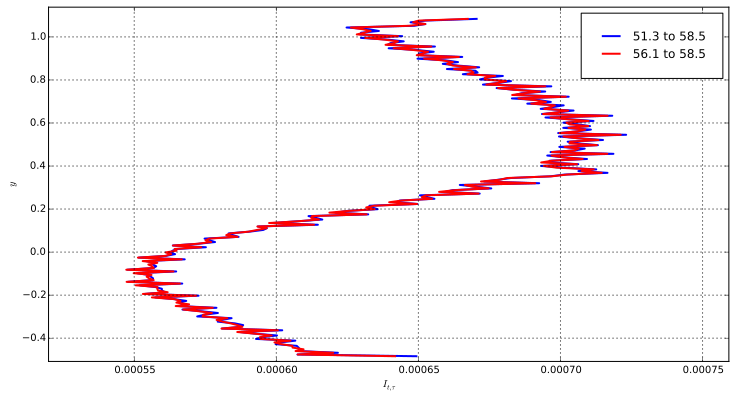

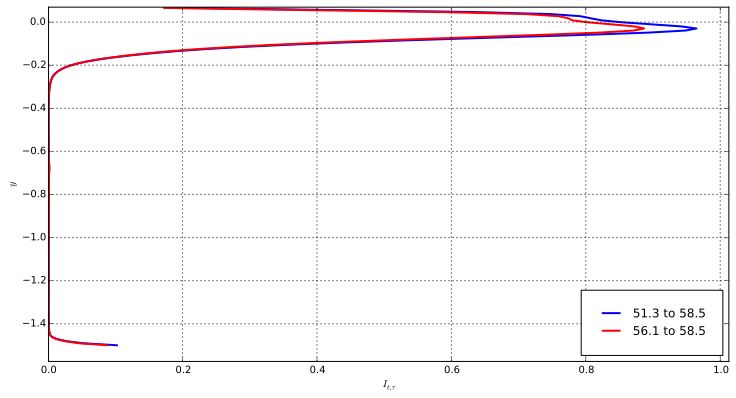

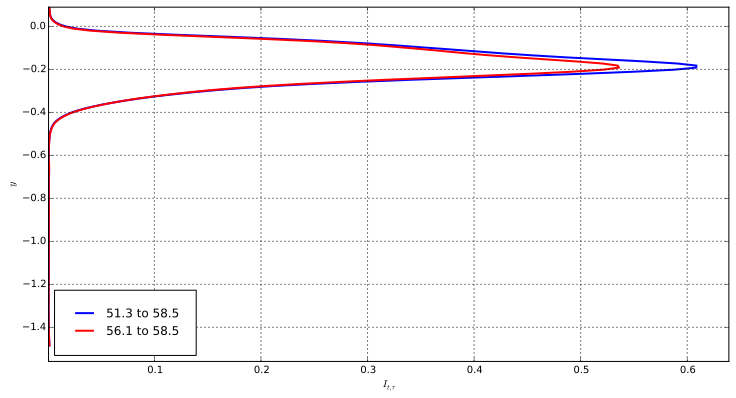

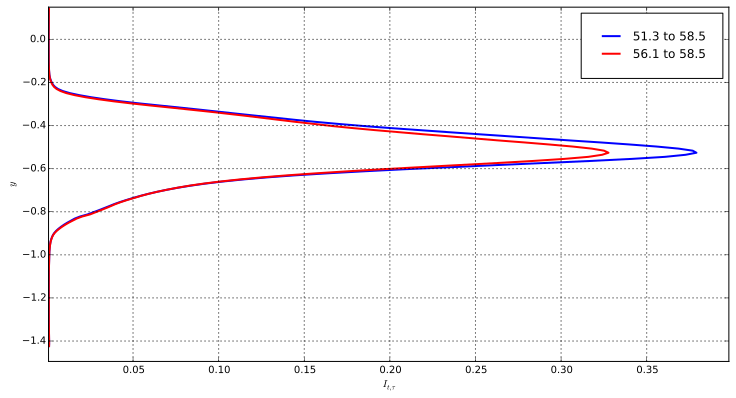

In [12]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(119,4))




for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_TI_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_TI_%s_%i.pdf"%(name_for_files,j))

Wake profiles for x position:  -0.3
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.05
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.2
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


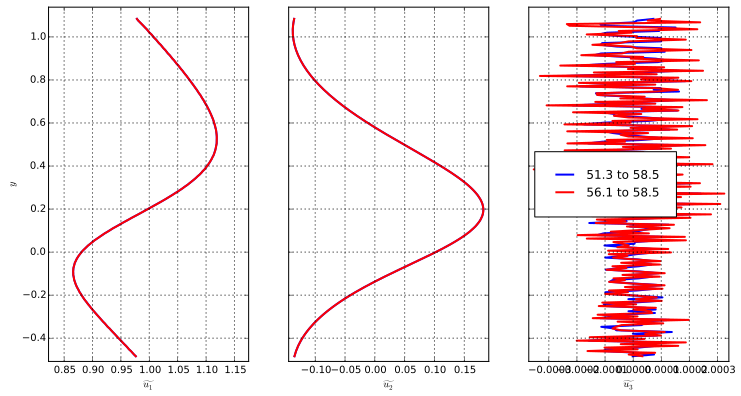

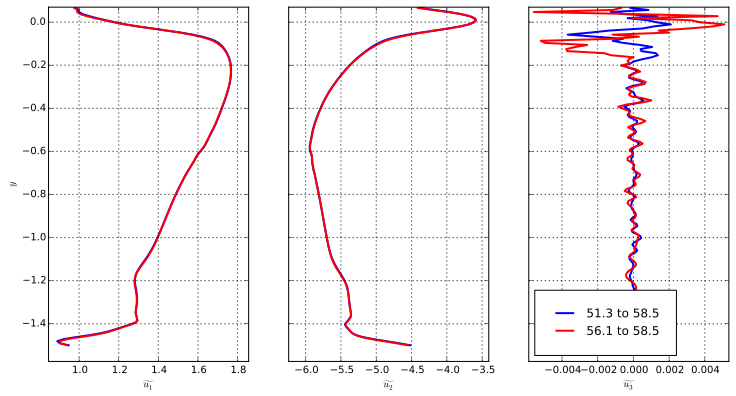

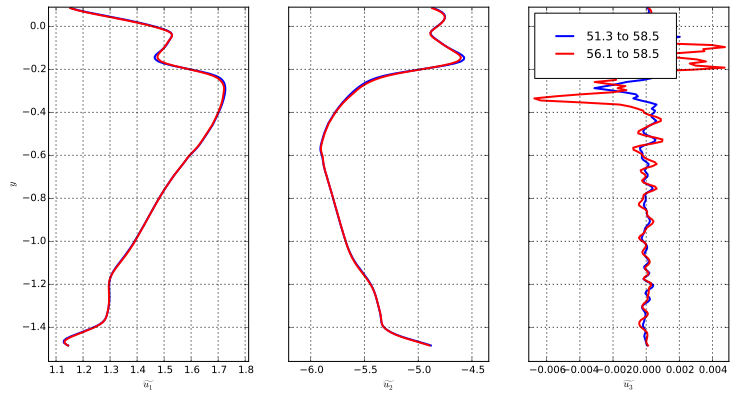

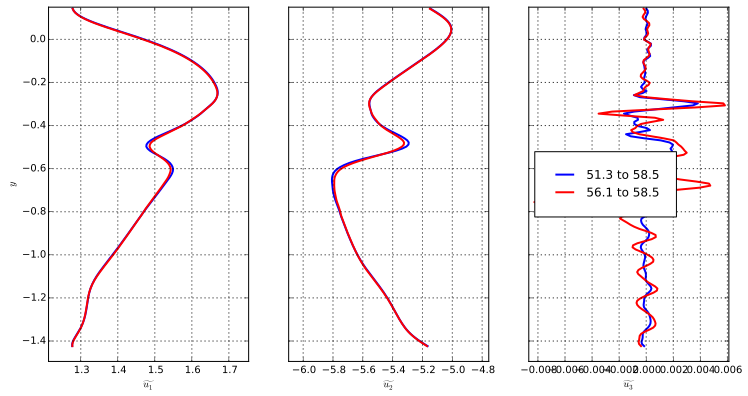

In [13]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(101,2))
plot_ids.append(wake[0].l[0].var.get_index(101,3))
plot_ids.append(wake[0].l[0].var.get_index(101,16))



for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_mean_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_mean_%s_%i.pdf"%(name_for_files,j))

Wake profiles for x position:  -0.3
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.05
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.2
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


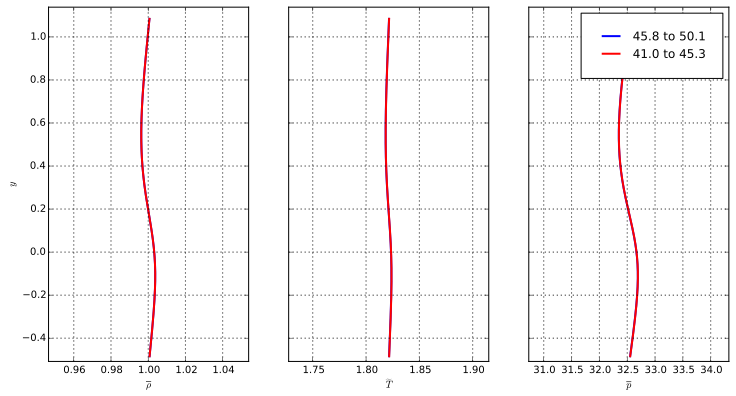

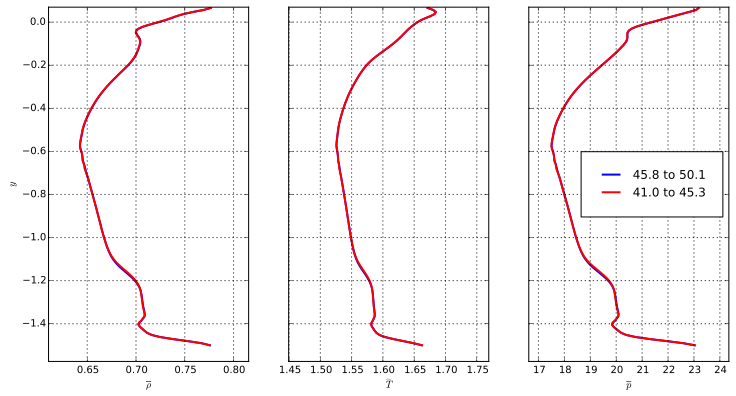

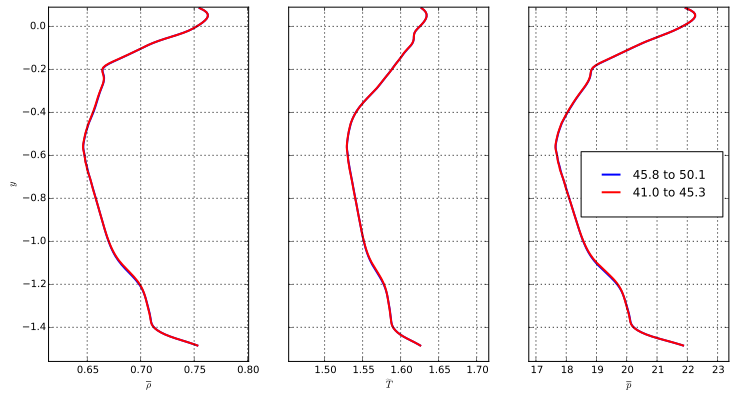

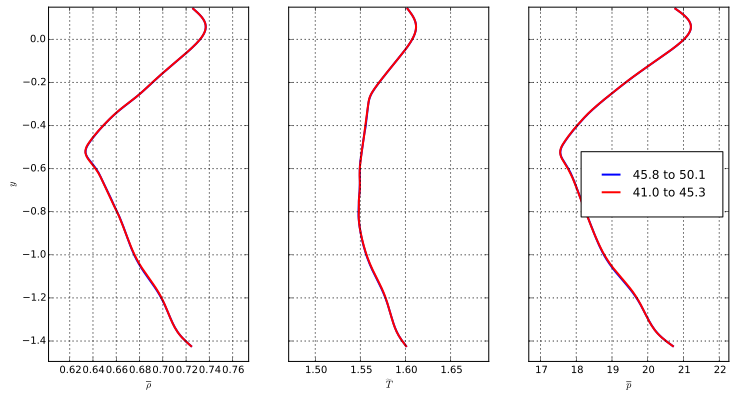

In [11]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(101,1))
plot_ids.append(wake[0].l[0].var.get_index(101,4))
plot_ids.append(wake[0].l[0].var.get_index(101,5))



for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_therm_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_therm_%s_%i.pdf"%(name_for_files,j))

Wake profiles for x position:  -0.3
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.05
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.2
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


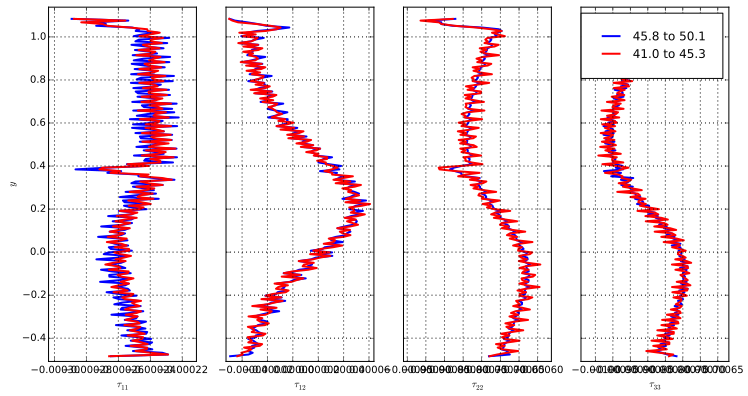

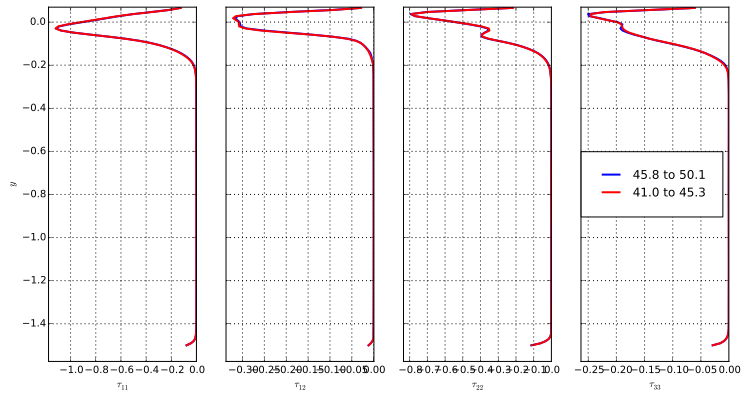

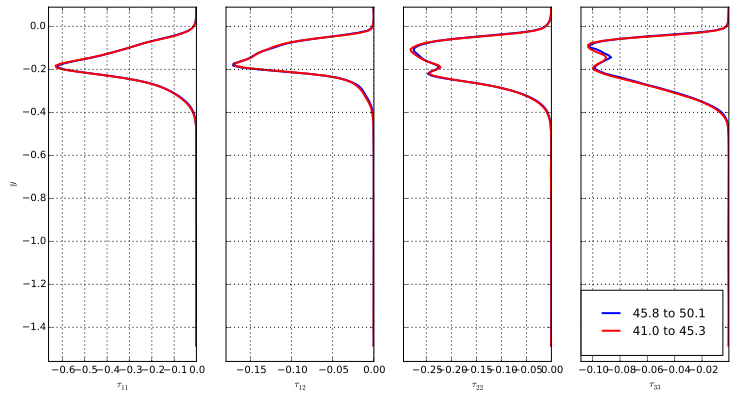

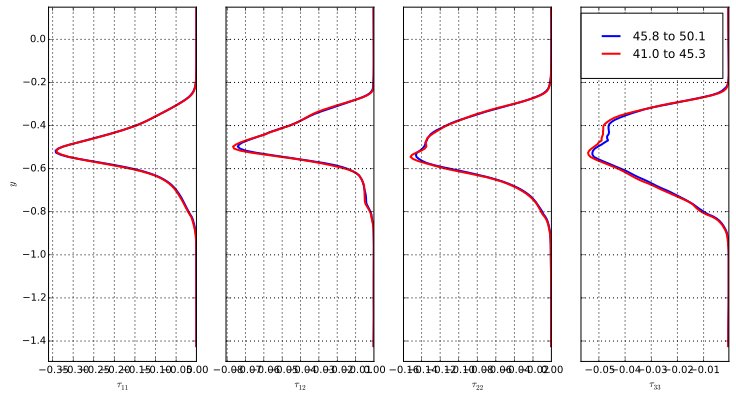

In [12]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(101,10))
plot_ids.append(wake[0].l[0].var.get_index(101,11))
plot_ids.append(wake[0].l[0].var.get_index(101,12))
plot_ids.append(wake[0].l[0].var.get_index(101,13))


for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_tau_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_tau_%s_%i.pdf"%(name_for_files,j))  

Wake profiles for x position:  -0.3
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.05
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.2
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


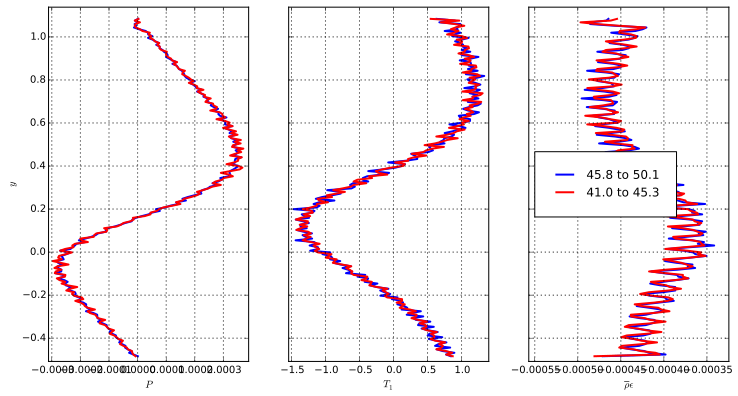

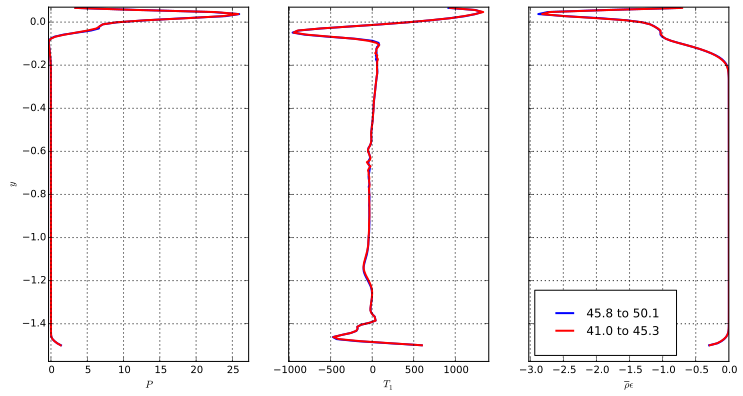

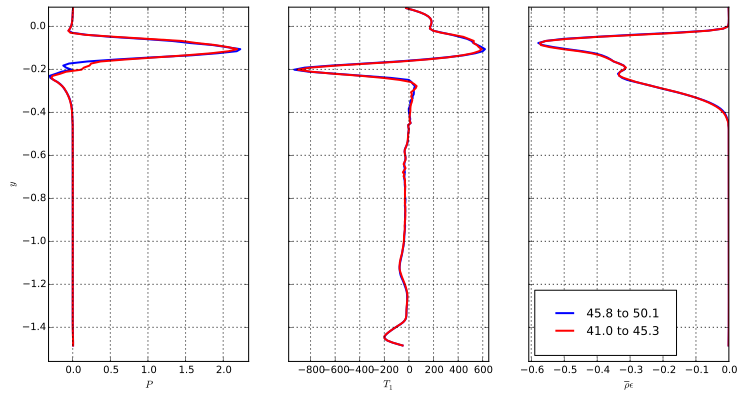

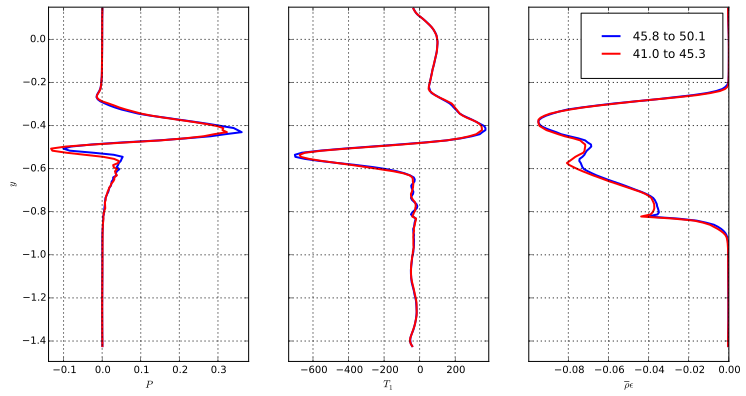

In [13]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(105,1))
plot_ids.append(wake[0].l[0].var.get_index(105,2))
plot_ids.append(wake[0].l[0].var.get_index(105,8))



for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_tke_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_tke_%s_%i.pdf"%(name_for_files,j))

## Selected case

In [14]:
case_index=0
filen=postdir[case_index]+'/STAT_cont.bin'

In [15]:
cascade=l.cascade_mean(-0.3,1.26,filename=filen,infile='../vki3d.in',Refplane='Outlet',chord=1.74)

Extracting line
Found 395 points.
Extracting line
Found 395 points.
extract line from (i,j) 448 1  to  448 1760  in block  4 1760
11
extract line from (i,j) 448 1  to  448 480  in block  3 480
11
extract line from (i,j) 448 1  to  448 1760  in block  5 1760
11
extract line from (i,j) 448 1  to  448 800  in block  7 800
11

/home/rp3e11/codes/platus/lines.py:1318: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.tang!=None:
/home/rp3e11/codes/platus/lines.py:1321: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.plus_coords!=None:
/home/rp3e11/codes/platus/lines.py:1323: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.cf!=None:
/home/rp3e11/codes/platus/lines.py:1421: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.len_el==None:


/home/rp3e11/codes/platus/lines.py:1359: RuntimeWarning: invalid value encountered in double_scalars
  self.nondim[i]=(self.data[i,index]-self.data[0,index])/len_line


file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


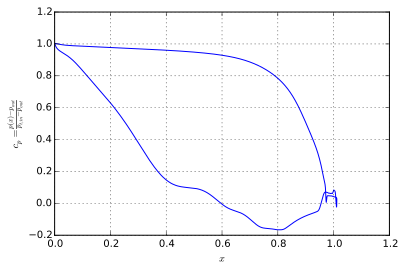

In [16]:
plt.figure()
plt.plot(cascade.blade.data[:,0],cascade.cp)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$c_p= \\frac{p(x)-p_{out}}{p_{t,in}-p_{out}}$')
tikz_save("cp_blade.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


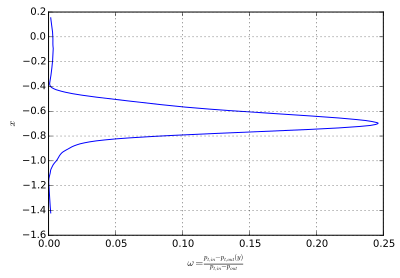

In [17]:
plt.figure()
plt.plot(cascade.loss_mix,cascade.outlet.data[:,1])
plt.grid()
plt.ylabel('$x$')
plt.xlabel('$\omega= \\frac{p_{t,in}-p_{t,out}(y)}{p_{t,in}-p_{out}}$')
tikz_save("wake_loss.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

In [18]:
cascade.report_integral_mixed_out()

Isentropic Reynolds Number:   1065598.77388
Isentropic Mach Number:    0.9173903100
Isentropic Reynolds Number:   1086167.21212 (inlet mass averaged)
Isentropic Mach Number:    0.9173844025 (inlet mass averaged)
Isentropic exit Velocity:    5.6636930082
Mixed out loss    0.0352915354
Inlet angle:    0.0197812970
Inlet Mach number:    0.1481934914
Inlet stagnation pressure:   33.0220171786
Inlet stagnation Temperature:    1.8290626530
Inlet static pressure:   32.5193491621
Inlet static Temperature:    1.8210640622
Outlet angle:  -75.0183472639
Outlet Mach number:    0.9037378450
Outlet stagnation pressure:   32.5327126111
Outlet stagnation Temperature:    1.8276131188
Outlet static pressure:   19.1573733667
Outlet static Temperature:    1.5709937708
Outlet density:    0.6828880728


file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


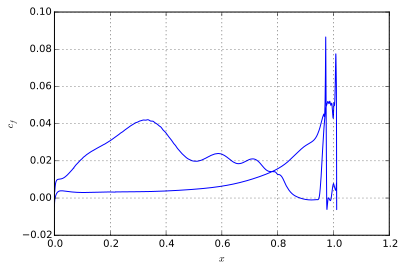

In [19]:
plt.figure()
plt.plot(cascade.blade.data[:,0],cascade.blade.cf)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$c_f $')
tikz_save("cf_blade.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

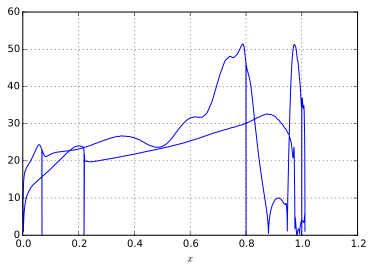

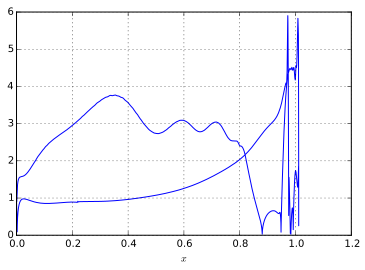

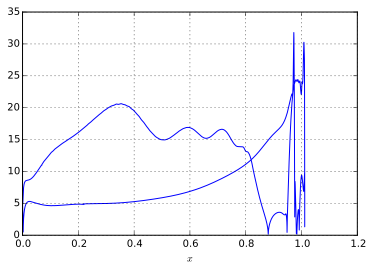

In [20]:
for i in range(3):
    plt.figure()
    plt.plot(cascade.blade.data[:,0],cascade.blade.plus_coords[:,i])
    plt.grid()
    plt.xlabel('$x$')
    #plt.ylabel('$c_f $')
    #tikz_save("cf_blade.tikz",
    #              figureheight = '\\fh',
    #              figurewidth = '\\fw')  

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


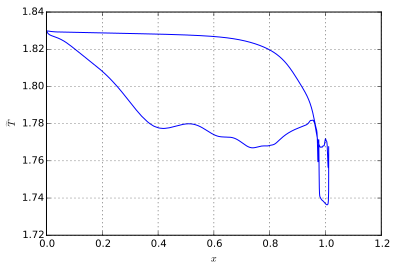

In [21]:
plt.figure()
ind=cascade.blade.var.get_index(101,4)
plt.plot(cascade.blade.data[:,0],cascade.blade.data[:,ind])
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$\widetilde{T} $')
tikz_save("T_blade.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

# Monitor point trends

Analyze monitor points for one upstream and down stream position to check for trends

## Write out data to compare cases

In [ ]:
print postdir[case_index]
stat_file=postdir[case_index]+'/STAT_cont.bin'

In [ ]:
rho_ind=wake[1].l[case_index].var.get_index(101,1)
u_ind=wake[1].l[case_index].var.get_index(101,2)
v_ind=wake[1].l[case_index].var.get_index(101,3)
p_ind=wake[1].l[case_index].var.get_index(101,5)
T_ind=wake[1].l[case_index].var.get_index(101,4)
tau11_ind=wake[1].l[case_index].var.get_index(101,10)
tau22_ind=wake[1].l[case_index].var.get_index(101,12)
tau33_ind=wake[1].l[case_index].var.get_index(101,13)
tau12_ind=wake[1].l[case_index].var.get_index(101,11)
tau33_ind=wake[1].l[case_index].var.get_index(101,13)
P_ind=wake[1].l[case_index].var.get_index(105,1)
eps_ind=wake[1].l[case_index].var.get_index(105,8)
k_ind=wake[1].l[case_index].var.get_index(109,12)
Ti_ind=wake[1].l[case_index].var.get_index(119,4)

In [ ]:
for i in range(3):
    dataset=wake[i+1].l[case_index]
    outlet_comp_file='outlet_comp_%s_%i.dat'%(name_for_files,i+1)
    of=open(outlet_comp_file,'w')
    of.write('%25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s\n'%('y','rho_bar','u_tile','v_tile','p_bar','T_tile','tau_11,','tau_22','tau_33','tau_12,','k','P','epsilon','TI'))
    of.write('x=%15.8f, npoints = %i\n'%(dataset.data[0,0],dataset.npoints))    
    for j in range(dataset.npoints):
            of.write('%25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f\n'%(dataset.data[j,1],dataset.data[j,rho_ind],dataset.data[j,u_ind],dataset.data[j,v_ind],
                                   dataset.data[j,p_ind],dataset.data[j,T_ind],dataset.data[j,tau11_ind],dataset.data[j,tau22_ind],
                                   dataset.data[j,tau33_ind],dataset.data[j,tau12_ind],dataset.data[j,k_ind],dataset.data[j,P_ind],
                                   dataset.data[j,eps_ind],dataset.data[j,Ti_ind]))          
    of.close()